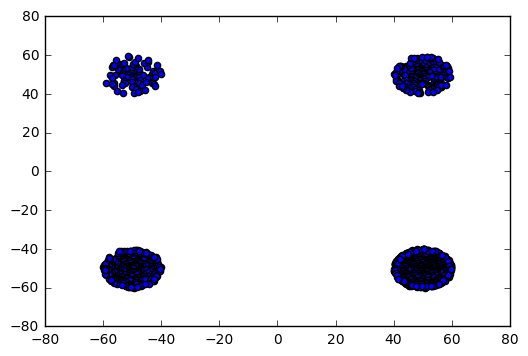

In [92]:
import random
import math
import matplotlib.pyplot as plt 
%matplotlib inline

R = 10.
n_rings = 10. #Modifying this variable has a huge impact on the density of the points. 
n_angles = 2.
dr = 10./n_rings
da = 2*math.pi/n_angles

base_points_per_division = 3
increase_per_level = 1.1

def generate_cluster(devx=0,devy=0):
    global base_points_per_division;
    points = []
    ring = 0
    while ring < n_rings:
        angle = 0
        while angle < n_angles:
            for i in xrange(int(base_points_per_division)):
                ra = angle*da + da*random.random()
                rr = ring*dr + dr*random.random()
                x = devx+rr*math.cos(ra)
                y = devy+rr*math.sin(ra)
                points.append((x,y))
            angle += 1
        base_points_per_division = base_points_per_division*increase_per_level
        ring += 1
    return points

points1=generate_cluster(devx=-50,devy=+50)
points2=generate_cluster(devx=+50,devy=+50)
points3=generate_cluster(devx=-50,devy=-50)
points4=generate_cluster(devx=+50,devy=-50)
points=points1+points2+points3+points4;

xs1=[x[0] for x in points1]
xs2=[x[0] for x in points2]
xs3=[x[0] for x in points3]
xs4=[x[0] for x in points4]

xs=xs1+xs2+xs3+xs4;

ys1=[x[1] for x in points1]
ys2=[x[1] for x in points2]
ys3=[x[1] for x in points3]
ys4=[x[1] for x in points4]
ys=ys1+ys2+ys3+ys4;

#plt.plot(xs,ys)
plt.scatter(xs,ys)
plt.show()    

C:\Users\bodap\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


('Num converged: ', 0)
('Num converged: ', 4)
('All converged!! in n_iter= ', 1)


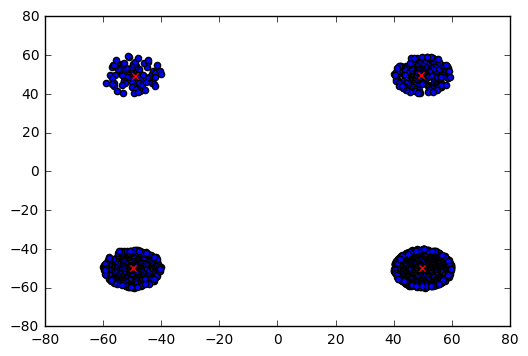

In [93]:
import numpy as np

def clustering(points,n_clusters=4,initial_c=None):
    ndim=len(points[0]);
    if initial_c==None:
        initial_centers=np.random.rand(n_clusters,ndim);
    else:
        initial_centers=initial_c;
    #print("init_c=",initial_centers)
    
    distance_matrix=np.random.rand(n_clusters,len(points));
    for p in range(len(points)):
        for c in range(n_clusters):
            distance_matrix[c,p]=np.sqrt(np.linalg.norm(points[p]-initial_centers[c]));
    
    closest_clusters=np.argmin(distance_matrix,axis=0);       
    #print(closest_clusters[700:1700]) 
    
    points_cluster_c=np.zeros((n_clusters,ndim));
    for c in range(n_clusters):
        indices=np.where(closest_clusters == c)[0]
        for index in indices:
            points_cluster_c[c]+=points[index];
        initial_centers[c]=points_cluster_c[c]/(len(indices)+1);
    #print ("init_centers=",initial_centers)    
    return initial_centers        
        
#print(len(points))
def kmeans(n_iter=100,n_clusters=4):
    ic=clustering(points);
    for it in range(n_iter):
        ic_old=ic.copy();
        ic=clustering(points,initial_c=ic);
        #print("ic= ",ic)
        #print("ic_old=",ic_old)
        count=0;
        for c in range(n_clusters):
            if np.sqrt(np.linalg.norm(ic[c]-ic_old[c]))<0.0001:
                #print np.sqrt(np.linalg.norm(ic[c]-ic_old[c])) 
                count+=1;
        print("Num converged: ",count);        
        if count==n_clusters: 
            print("All converged!! in n_iter= ",it);
            return ic;
    return ic;

ic=kmeans(n_iter=10);        
xc=[x[0] for x in ic];
yc=[x[1] for x in ic];

plt.scatter(xs,ys,hold=True)

plt.scatter(xc,yc,marker='x',color='r',hold=True)
plt.show()